In [9]:
# Import libraries
from functions import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import shapely
from shapely import plotting

In [10]:
combined_map, point_map, line_map = clean_data_lines()
pois = clean_data_points()

In [11]:
roads = get_street_geometries()

c:\Users\karla\repos\Here-Hackaton\functions.py:144: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  data_2['geometry'] = names['geometry']
c:\Users\karla\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\karla\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: Settin

In [23]:
roads[7]

,link_id,DIR_TRAVEL,ST_NAME,geometry
5807,1159555465,B,AVENIDA MIGUEL HIDALGO,POINT (-99.61445 19.28034)
5807,1159555465,B,AVENIDA MIGUEL HIDALGO,POINT (-99.61457 19.28035)
5808,1159555466,B,AVENIDA MIGUEL HIDALGO,POINT (-99.61445 19.28034)
5808,1159555466,B,AVENIDA MIGUEL HIDALGO,POINT (-99.61397 19.28035)
5809,799359779,B,AVENIDA MIGUEL HIDALGO,POINT (-99.61568 19.28035)
...,...,...,...,...
30310,1159655260,B,AVENIDA MIGUEL HIDALGO,POINT (-99.54104 19.33594)
30317,1159655266,B,AVENIDA MIGUEL HIDALGO,POINT (-99.54299 19.3351)
30317,1159655266,B,AVENIDA MIGUEL HIDALGO,POINT (-99.54199 19.33554)
31162,1159655262,B,AVENIDA MIGUEL HIDALGO,POINT (-99.54199 19.33554)


In [ ]:
grouped_data = []
for i in range(len(roads)):
    roads[i].drop(columns=['cluster'], inplace=True)
    grouped_roads = roads[i].dissolve(by='ST_NAME', aggfunc = list)
    if grouped_roads['DIR_TRAVEL'].count('T') > 0 and grouped_roads['DIR_TRAVEL'].count('F') > 0:
        grouped_data.append(grouped_roads)
    grouped_data.append(grouped_roads)

In [21]:
len(roads)

300

In [30]:
grouped_data[7].head()

,geometry,link_id,DIR_TRAVEL
ST_NAME,,,
AVENIDA MIGUEL HIDALGO,"MULTIPOINT ((-99.65104 19.28998), (-99.65008 1...","[1159555465, 1159555465, 1159555466, 115955546...","[B, B, B, B, B, B, B, B, B, B, B, B, B, B, B, ..."


<Axes: >

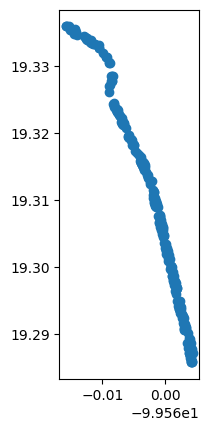

In [32]:
grouped_data[3].plot()